## Simple Linear Regression

#### Importing notebooks

In [1]:
%%capture
%run '01_Getting_Data.ipynb'

#### Importing packages

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

### 1. Define X and Y values

In [3]:
x = data.search_volume.values
y = data.bitcoin_price.values

length = len(x)

x = x.reshape(length, 1)
y = y.reshape(length, 1)

### 2. Define Sizes for Training and Testing Sets

#### Find most suitable size for testing data by iterating over all ranges that are below 20% of the existing data size. The most suitable size for testing data has the smallest Root Mean Square Error.

In [4]:
max = round(length*0.2)
columns = ['Root Mean Square Error']
df = pandas.DataFrame(index=range(0,max), columns=columns)
df.index.name = 'test_size'

for value in range(1, max):
    test_size = value
    train_size = length - test_size

    x_train = x[:train_size]
    y_train = y[:train_size]

    x_test = x[-test_size:]
    y_test = y[-test_size:]

    regression = linear_model.LinearRegression()
    regression.fit(x_train, y_train)
    y_predict = regression.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, y_predict))
    df.set_value(value, 'Root Mean Square Error', rmse)
df.sort_values(by=['Root Mean Square Error']).head(10)

,Root Mean Square Error
test_size,
18,1439.09
19,1455.04
17,1463.9
13,1471.88
11,1483.63
16,1494.34
10,1495.78
20,1497.85
12,1498.05


Output above returns 18 as a suitable testing size. The table was sorted based on smallest Root Mean Square Error.

In [5]:
test_size = round(length*0.1)
train_size = length - test_size

In [6]:
x = x.reshape(length, 1)
y = y.reshape(length, 1)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[-test_size:]
y_test = y[-test_size:]

### 2. Execute Linear Regression

In [7]:
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)

coef = regression.coef_[0][0]
intercept = regression.intercept_[0]

print("coefficient: \t" + repr(round(coef,1)))
print("intercept: \t" + repr(round(intercept,1)))

coefficient: 	39.700000000000003
intercept: 	80.700000000000003


Mathematical equation for red fitting line:
\begin{align}
{f(x)} & = 83.6*x-120 \\
\end{align}

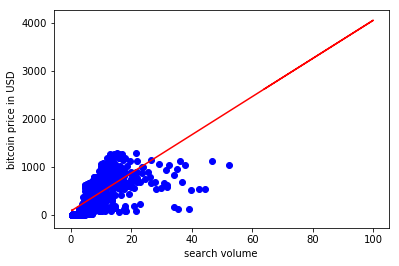

In [10]:
fig, ax = pyplot.subplots()
ax.plot(x, coef * x + intercept, color='red')
ax.scatter(x_train, y_train, color='blue')
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

In [11]:
y_predict = regression.predict(x_test)

In [12]:
rmse = sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

2189.852178962802


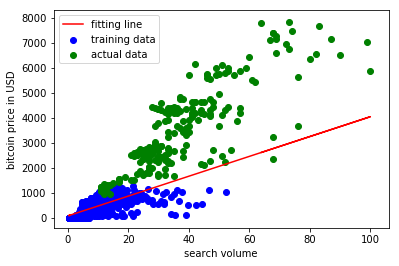

In [13]:
fig, ax = pyplot.subplots()
ax.scatter(x_train, y_train, color='blue', label = 'training data')
#ax.scatter(x_test, y_predict,  color='red', label = 'predicted data', s = 1)
ax.plot(x, coef * x + intercept, color='red', label = 'fitting line')
ax.scatter(x_test, y_test,  color='green', label = 'actual data')
ax.legend(loc=2)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

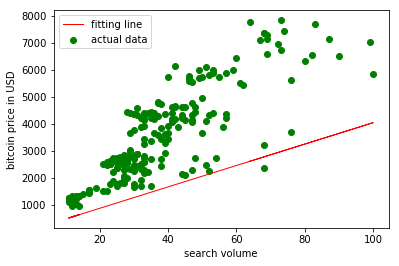

In [14]:
fig, ax = pyplot.subplots()
ax.scatter(x_test, y_test,  color='green', label = 'actual data')
#ax.scatter(x_test, y_predict,  color='red', label = 'predicted data')
ax.plot(x_test, y_predict, color='red', linewidth=1, label = 'fitting line')
ax.legend(loc=0)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

Calculation of the smallest error delta for the difference between predicted data and actual data

In [15]:
error_delta = abs(y_predict-y_test)
smallest_error_delta = numpy.amin(error_delta, axis=0)[0]
print(smallest_error_delta)

103.617763282


In [20]:
train, test = train_test_split(data, test_size=0.1)

In [25]:
train.bitcoin_price.values

array([   5.9541,  496.6164,  930.905 , ...,  246.5814,  371.864 ,
        236.0996])

In [31]:
x_train_reshaped = train.search_volume.values.reshape(len(train), 1)
y_train_reshaped = train.bitcoin_price.values.reshape(len(train), 1)

x_test_reshaped = test.search_volume.reshape(len(test), 1)
y_test_reshaped = test.bitcoin_price.reshape(len(test), 1)

/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [33]:
regression = linear_model.LinearRegression()
regression.fit(x_train_reshaped, y_train_reshaped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)